## Исследование авторынка Казахстана за 2019 год

Датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из официальной статистики VAG.

**Цели:**

 1) Очистить данные, подготовить к анализу.

 2) Исследовать рынок автомобилей в Казахстане за 2019 год.

**Задачи:**

- преобразование типов данных, избавление от дубликатов/выбросов/пропусков.
- определить топовые марки на рынке Казахстана: в денежном и натуральном выражении (5-10 марок)
- проанализировать динамику продаж всех марок в денежном и натуральном выражении
- проанализировать динамику продаж по категориям: тип топлива, класс, сегмент, автоцентры.
- создать дашборд (https://datalens.yandex/89u8kktyyyc2x)


**Описание данных:**

- ***Год*** - год продажи
- ***Месяц*** - месяц продажи
- ***Компания*** - название компании (дилера)
- ***Бренд*** - марка автомобиля
- ***Модель*** - модель автомобиля
- ***Модификация***
- ***Год выпуска*** - год производства автомобиля
- ***Страна производитель***
- ***Вид топлива***
- ***Объем двигателя***
- ***Коробка передач*** - тип коробки переключения передач
- ***Тип привода***
- ***Сегмент***
- ***Регион продажи***
- ***Наименование дилерского центра***
- ***Тип клиента*** - Юрлицо / физлицо
- ***Форма расчета***
- ***Количество*** - количество машин в заказе
- ***Цена, USD*** - цена машины
- ***Продажа, USD*** - цена заказа (итог)
- ***Область*** - область продажи
- ***Сегментация 2013*** - сегменты автомобилей
- ***Класс 2013*** - класс автомобилей
- ***Класс Eng***
- ***Локализация производства***

In [ ]:
#pip install pandas-profiling

In [ ]:
# загружаем библиотеки
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Обработка данных

In [ ]:
url = 'https://drive.google.com/file/d/1xQh6MmgLLxSlcfpKPqKc_NOUMT6ZQu4H/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
df = pd.read_csv(url, sep = ';', decimal=',')
df.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,наличный,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,безналичный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,наличный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [ ]:
df['Область'].unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [ ]:
# посмотрим типы данных и пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

**Необходимые преобразования:**

**1.** Удалить лишние столбцы (по ТЗ это - Сегмент, Форма расчета, Сегментация Eng, Модификация, Наименование дилерского центра, Локализация производства).

**2.** Переименовать оставшиеся столбцы

**3.** Изменить тип данных:
       
       1) Тип данных "Год выпуска" преобразовать в int
       2) Объем двигателя --> float, после проверки
       3) Количество --> int после проверки

**4.** Проверить пропуски: Год выпуска, Вид топлива, Объём двиг (л), Коробка передач, Тип привода, Тип клиента, Форма расчета, Количество.

**5**. Проверить на дубликаты

In [ ]:
# удаляем столбцы
df = df.drop(columns = ['Сегмент', 'Форма расчета', 'Сегментация Eng', 'Модификация', 'Наименование дилерского центра', \
                       'Локализация производства'])

# переименовываем
df = df.rename(columns = {'Год': 'sales_year', 'Месяц': 'sales_month', 'Компания': 'company', 'Бренд':'brand',
                          'Модель': 'model', 'Год выпуска': 'year_car',
                          'Страна-производитель': 'country', 'Вид топлива': 'fuel', 'Объём двиг, л,': 'engine_capacity',
                          'Коробка передач': 'transmission', 'Тип привода': 'type_drive', 'Регион': 'region',
                          'Тип клиента': 'client', 'Количество': 'amount',
                          'Цена, USD': 'price', 'Продажа, USD':'sales', 'Область':'oblast',
                          'Сегментация 2013': 'segment', 'Класс 2013': 'class_2013'})

In [ ]:
# вызовем метод profile_report

#profile = df.profile_report(title='Pandas Profiling Report', progress_bar=False)
#profile

In [ ]:
# метод profile не учитывает пропуски при подсчете дубликатов
print('Количество дубликатов:', sum(df.duplicated()))
df[df.duplicated()].tail()

Количество дубликатов: 22321


,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39965,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики


В таблице почти 40 000 наблюдений, из них 22 300 строки дубликаты, суммарно 3% пустых ячеек. Так как в датасете не представлен уникальный код для каждого авто (закрытая информация), то не будем удалять дубликаты.

Индексы уникальны, предполагается, что 1 строка - это 1 заказ. Строки упорядочены по индексу.

Преобразования по столбцам:

**Преобразовать в дату**: sales_year, sales_month.

**Проверить на неявные дубликаты:** company, brand, year_car (пропуски), fuel (пропуски), client (пропуски), oblast.

**Привести к одному языку:** country, region, class_2013, transmission (пропуски), type_drive (пропуски)

**engine capacity** - есть пропуски и выбросы

**amount** - есть отрицательное значение

**price** - есть выбросы

**sales** - есть отрицательные значения и выбросы

**1. company**

In [ ]:
# поиск неявных дубликатов
print(df.company.unique())
len(df.company.unique())

['Mercur Auto' 'Автоцентр-Бавария' 'БИПЭК АВТО' 'Вираж'
 'Eurasia Motor Premium' 'Daewoo Bus Kazakhstan' 'Caspian Motors'
 'Каспиан Моторс' 'СемАЗ' 'Astana Motors' 'Astana Motors '
 'Hyundai Com Trans Kazakhstan ' 'Nissan Manufacturing RUS' 'СВС-ТРАНС'
 'Allur Auto' 'Almaty Motors Premium' 'TERRA MOTORS' 'ТК КАМАЗ'
 'Toyota Motor Kazakhstan' 'Лифан Моторс Рус' 'MAN Truck & Bus Kazakhstan'
 'Автомир ГК' 'Autokapital' 'Автокапитал' 'ММС Рус' 'MMC RUS'
 'Mercur Autos' 'УзАвто-Казахстан' 'Равон Моторс Казахстан'
 'Ravon Motors Kazakstan' 'Renault Россия' 'Scania Central Asia'
 'Subaru Kazakhstan' 'Volkswagen Group Rus' 'Автодом Motors KST'
 'Автомир-Центр' 'ТОО "Eurasia Motor Zhaik"' 'Scandinavian Motors'
 'Хино Моторс Казахстан' 'Hino Motors ']


40

In [ ]:
# преобразуем названия, чтобы не было дубликатов на двух языках

df['company'] = df['company'].replace(['Caspian Motors', 'Astana Motors ', 'Hyundai Com Trans Kazakhstan ', \
                                       'Autokapital', 'MMC RUS', 'Ravon Motors Kazakstan', 'Hino Motors '], \
                                      ['Каспиан Моторс', 'Astana Motors', 'Hyundai Com Trans Kazakhstan', 'Автокапитал', \
                                       'ММС Рус', 'Равон Моторс Казахстан', 'Хино Моторс Казахстан'])

**2. brand**

In [ ]:
print(df.brand.unique())
len(df.brand.unique())

['Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Ford' 'Foton' 'GAZ' 'Hyundai'
 'Hyundai Truck & Bus' 'Infiniti' 'Isuzu' 'Iveco' 'Jac' 'Jaguar' 'KAMAZ'
 'Kia' 'Lada' 'Land Rover' 'Lexus' 'Lifan' 'MAN' 'Mazda' 'Mercedes-Benz'
 'Mercedes-Benz Trucks' 'Mini' 'Mitsubishi' 'Nissan' 'Peugeot' 'Porsche'
 'Ravon' 'Renault' 'Scania' 'Skoda' 'Subaru' 'Toyota' 'UAZ' 'Volkswagen'
 'Volvo' 'Урал' 'Cadillac' 'Shacman' 'Hino' 'Dong Feng' 'ANKAI' 'Nefaz'
 'Yutong']


46

In [ ]:
# создадим новый столбец с полным названием машины
df['name'] = df['brand'] + ' ' + df['model']

**3. year_car**

In [ ]:
print(df.year_car.unique())
len(df.year_car.unique())

['2018' '2017' '2019' nan '2016' '2014' '2013' '2011' '2\xa0018'
 '2\xa0019']


10

In [ ]:
# заменим числа с ошибками
df['year_car'] = df['year_car'].replace(['2\xa0018', '2\xa0019'], ['2018', '2019'])

**Проверим пропуски (как было видно из репорта их 1.3%)**

In [ ]:
# для каких брендов чаще встречаются пропуски в годе выпуска машины
df.query('year_car!=year_car').groupby('brand')['brand'].count().sort_values(ascending = False)

brand
Jac                    221
Hyundai Truck & Bus     94
Volkswagen              68
Mazda                   52
Mitsubishi              46
Ravon                   10
Land Rover               5
Jaguar                   2
Volvo                    2
BMW                      1
Name: brand, dtype: int64

In [ ]:
# распределение по компаниям
df.query('year_car!=year_car').groupby('company')['company'].count().sort_values(ascending = False)

company
Allur Auto                      221
Hyundai Com Trans Kazakhstan     94
Volkswagen Group Rus             68
Автомир ГК                       52
ММС Рус                          46
УзАвто-Казахстан                 10
Almaty Motors Premium             7
Scandinavian Motors               2
Автоцентр-Бавария                 1
Name: company, dtype: int64

Таким образом, большая часть пропусков характерна для машин бренда Jac, Hyundai Truck & Bus, Volkswagen в автосалонах Allur Auto, Hyundai Com Trans Kazakhstan, Volkswagen Group Rus.

***Можно заполнить данные по уже имеющимся машинам данных моделей с одинаковыми характеристиками.***

In [ ]:
# зададим условие по характеристикам машины
df.query('company == "Allur Auto" and name == "Jac S3" and \
year_car != year_car and engine_capacity == "1,6" and transmission == "MT"').head()

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013,name
13700,2019,Апрель,Allur Auto,Jac,S3,NaN,Республика Казахстан,NaN,"1,6",MT,NaN,ЭКСПОРТ,NaN,1.0,12947.36842,12947.36842,Экспорт область,Внедорожники,Субкомпактные SUV,Jac S3
13701,2019,Апрель,Allur Auto,Jac,S3,NaN,Республика Казахстан,NaN,"1,6",MT,NaN,ЭКСПОРТ,NaN,1.0,12947.36842,12947.36842,Экспорт область,Внедорожники,Субкомпактные SUV,Jac S3
13702,2019,Апрель,Allur Auto,Jac,S3,NaN,Республика Казахстан,NaN,"1,6",MT,NaN,ЭКСПОРТ,NaN,1.0,12947.36842,12947.36842,Экспорт область,Внедорожники,Субкомпактные SUV,Jac S3
13703,2019,Апрель,Allur Auto,Jac,S3,NaN,Республика Казахстан,NaN,"1,6",MT,NaN,ЭКСПОРТ,NaN,1.0,12947.36842,12947.36842,Экспорт область,Внедорожники,Субкомпактные SUV,Jac S3
13704,2019,Апрель,Allur Auto,Jac,S3,NaN,Республика Казахстан,NaN,"1,6",MT,NaN,ЭКСПОРТ,NaN,1.0,12947.36842,12947.36842,Экспорт область,Внедорожники,Субкомпактные SUV,Jac S3


Видно, что большая часть строк являются дубликатами, но не понятно, можно ли их удалить. Возможно, это разные покупки или дубли одной.

In [ ]:
# необходимо заполнить год выпуска машины, поэтому посмотрим, как год влияет на цену для строк, в которых не пропущены данные
df.query('company == "Allur Auto" and name == "Jac S3" \
and engine_capacity == "1,6" and transmission == "MT"').groupby('year_car')['price'].agg({'median', 'mean', 'count'})

,count,mean,median
year_car,,,
2018,7,12204.698463,12172.40553
2019,25,12737.269161,12894.26617


**Машины 2019 года имеют более высокую среднюю и медианную цену при одинаковых характеристиках по сравнению с машинами 2019 года.**

In [ ]:
# заполним пропуски по конкретной машине
df.loc[(df['name'] == "Jac S3") & (df['year_car'].isna()) & (df['transmission'] == "MT"), 'year_car'] = \
df.loc[(df['name'] == "Jac S3") & (df['year_car'].isna()) & (df['transmission'] == "MT"), 'year_car'].fillna('2019')

In [ ]:
# рассмотрим зависимость цены от года выпуска для машины этой же модели, но с другими характеристиками
df.query('company == "Allur Auto" and name == "Jac S3" \
and engine_capacity == "1,6" and transmission == "CVT"').groupby('year_car')['price'].agg({'median', 'mean', 'count'})

,count,mean,median
year_car,,,
2018,101,13931.811695,13914.10474
2019,587,12891.982510,12819.73695


В данном случае обратная ситуация, машины 2018 года оказались дороже, чем 2019. На цену также могли влиять и другие факторы, типо месяца продажи, поэтому оставим данный пропуск.

In [ ]:
# доля пропусков
len(df[df['year_car'].isna()])/len(df)

0.008732422559175298

In [ ]:
# преобразовываем в числовой тип
df['year_car'] = df['year_car'].astype(np.float).astype("Int64")

Таким образом, пропусков в годе выпуска машины менее 1%, поэтому оставим их.

**4. country**

In [ ]:
print(df.country.unique())
len(df.country.unique())

['Германия' 'США' 'Австрия' 'Республика Казахстан' 'Российская Федерация'
 'Корея' 'Япония' 'Таиланд' 'Китай' 'UK' 'Узбекистан' 'Венгрия' 'Турция'
 'Испания' 'Нидерланды' 'Польша' 'Швеция' 'Белоруссия' 'Бельгия']


19

По ТЗ кодируем страны в столбце страна производства в alpha3 (RUS, KAZ, USA и т.д.)

In [ ]:
df['country'] = df['country'].replace(['Германия', 'США', 'Австрия', 'Республика Казахстан', 'Российская Федерация', \
                                       'Корея', 'Япония', 'Таиланд', 'Китай', 'UK', 'Узбекистан', 'Венгрия', 'Турция', \
                                       'Испания', 'Нидерланды', 'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], \
                                      ['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'THA', 'CHN', 'GBR', 'UZB', 'HUN', \
                                      'TUR', 'ESP', 'NLD', 'POL', 'SWE', 'BLR', 'BEL'])

**5. fuel**

In [ ]:
print(df.fuel.unique())
len(df.fuel.unique())

['Бензин' 'Дизель' nan 'дизель ' 'бензин ' 'гибрид' '2' '1,6' '0'
 'Электро' 'Электричество']


11

**В данном столбце содержится - 7.9% пропусков.**

In [ ]:
# проверим, для каких значений встречается 0
df.query('fuel == "0"')

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013,name
37121,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,KAZ,0,"2,693",5 МТ,Полный,Талдыкорган,NaN,1.0,14200.0,14200.0,Алматинская область,Коммерческие автомобили,Малотоннажные грузовики,UAZ 3741
37122,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,KAZ,0,"2,693",5 МТ,Полный,Актобе,NaN,3.0,14200.0,42600.0,Актюбинская область,Коммерческие автомобили,Малотоннажные грузовики,UAZ 3741
37123,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,KAZ,0,"2,693",5 МТ,Полный,Актау,NaN,2.0,14200.0,28400.0,Мангистауская область,Коммерческие автомобили,Малотоннажные грузовики,UAZ 3741


In [ ]:
# проверим, как заполнены другие строки для данной модели
df.query('name == "UAZ 3741"').head()

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013,name
37121,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,KAZ,0,"2,693",5 МТ,Полный,Талдыкорган,NaN,1.0,14200.000000,14200.000000,Алматинская область,Коммерческие автомобили,Малотоннажные грузовики,UAZ 3741
37122,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,KAZ,0,"2,693",5 МТ,Полный,Актобе,NaN,3.0,14200.000000,42600.000000,Актюбинская область,Коммерческие автомобили,Малотоннажные грузовики,UAZ 3741
37123,2019,Январь,БИПЭК АВТО,UAZ,3741,2018,KAZ,0,"2,693",5 МТ,Полный,Актау,NaN,2.0,14200.000000,28400.000000,Мангистауская область,Коммерческие автомобили,Малотоннажные грузовики,UAZ 3741
37124,2019,Февраль,Вираж,UAZ,3741,2018,RUS,Бензин,"2,7",Мех.,Полный,Усть-Каменогорск,Физ. Лицо,1.0,7542.182627,7542.182627,Восточно-Казахстанская область,Коммерческие автомобили,Малотоннажные грузовики,UAZ 3741
37125,2019,Февраль,Вираж,UAZ,3741,2018,RUS,Бензин,"2,7",Мех.,Полный,Караганда,Физ. Лицо,1.0,7542.182627,7542.182627,Карагандинская область,Коммерческие автомобили,Малотоннажные грузовики,UAZ 3741


Значение "0" характерно для определенной модели машины, судя по данным из таблицы и поиску в Интернете для машины характерен бензин, **поэтому 0 заполним как "бензин".**

In [ ]:
# проверим значения 2 и 1,6
df.query('fuel == "2" or fuel == "1,6"').groupby('name')['name'].count()

name
Renault Duster     32
Renault Sandero     5
Name: name, dtype: int64

In [ ]:
df.query('fuel == "2"').head().iloc[:, 5:15]

,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price
23723,2019,RUS,2,MT,4WD,4WD,Уральск,NaN,1.0,12249.61125
23724,2018,RUS,2,AT,4WD,4WD,Нур-Султан,NaN,1.0,12249.61125
23725,2018,RUS,2,AT,4WD,4WD,Нур-Султан,NaN,1.0,12249.61125
23726,2018,RUS,2,AT,4WD,4WD,Кызылорда,NaN,1.0,12249.61125
23727,2018,RUS,2,MT,4WD,4WD,Караганда,NaN,1.0,12249.61125


***Видно, что данные в столбцах fuel, engine_capacity, transmission "съехали" на 1 столбец.*** Чтобы сразу решить проблему с другими столбцами, сдвинем часть данных вправо на 1 столбец.

In [ ]:
# запишем данные в отдельную переменную
a = df.query('fuel == "1,6" or fuel == "2"').iloc[:, 7:11]

# сдвинем на один столбец вправо
a = a.shift(periods = 1, axis = 'columns')

# соединим столбцы
al = pd.concat([df.query('fuel == "1,6" or fuel == "2"').iloc[:, 0:7], \
                a, df.query('fuel == "1,6" or fuel == "2"').iloc[:, 11:21]], axis=1, ignore_index=False)

# перезапишем данные в датасет
df = df.query('fuel != "1,6" and fuel != "2"')
df = pd.concat([df, al])

# заменяем пропуски
df = df.replace({None: np.nan})

По ТЗ кодируем тип топлива в (F - fuel, D - diesel, E - electro, HYB - hybrid)

In [ ]:
# приведем значения к одному виду
df['fuel'] = df['fuel'].replace(['бензин ', 'дизель ', '0', 'Электро', 'гибрид', 'Бензин', 'Дизель', 'Электричество'], \
                                ['F', 'D', 'D', 'E', 'HYB', 'F', 'D', 'E'])

In [ ]:
df.query('fuel != fuel').groupby('brand')['brand'].count().sort_values(ascending = False).head()

brand
Renault    1770
Jac         598
GAZ         234
Mazda       112
ANKAI       103
Name: brand, dtype: int64

Почти все машины бренда Renault, Mazda не имеют данных в столбце fuel. **Придется оставить пропуски, так как для данных машин возможны 2 варианта топлива (но не гибрид).**

In [ ]:
# проверим следующую марка машин по количеству пропусков
df.query('brand == "Jac"').groupby(['name', 'fuel'])['price'].count()

name      fuel
Jac N120  D        60
          F        29
Jac N56   D        48
Jac N75   F         1
Jac S3    F       907
Jac S5    D         4
          F       285
Jac S7    F         1
Jac T6    D        42
          F        13
Jac X200  F         2
Jac iev   F         1
Name: price, dtype: int64

**Можно заполнить топливо у модели Jac S3, так как из данных таблицы и поиска в Интернете видно, что для этой модели характерен только бензин.**

In [ ]:
# заполним пропуски по конкретной машине
df.loc[(df['name'] == "Jac S3") & (df['fuel'].isna()), 'fuel'] = \
df.loc[(df['name'] == "Jac S3") & (df['fuel'].isna()), 'fuel'].fillna("F")

In [ ]:
# проверка для бренда GAZ
df.query('brand == "GAZ"').groupby(['name', 'fuel'])['price'].agg({'count', 'mean', 'median'})

count          mean       median
name     fuel                                  
GAZ 2217 F         3  23182.319517  23254.41431
GAZ 2310 D         6  11699.996947  11690.20619
         F        21  11676.172991  11679.35987
GAZ 2705 F       136  17813.820807  18383.53948
GAZ 2752 D         5  17204.778918  18270.02428
         F        46  18162.867949  18191.44123
GAZ 3221 F        59  19108.458773  18406.15260
GAZ 3302 D         1  13428.847910  13428.84791
         F       870  15284.763789  15536.51391
GAZ 3308 D        51  25424.887448  25580.41942
         F         3  25467.201690  25467.20169
GAZ 3309 D        40  22076.915756  22927.33179
GAZ Next D        43  24013.302720  25397.79160
         F       303  20650.712614  19202.51638

В данных для машины GAZ 3302 есть 1 строка с дизельным топливом и 870 с бензином, можно заполнить пропуски по данной модели - **значением F**.

In [ ]:
df.loc[(df['name'] == "GAZ 3302") & (df['fuel'].isna()), 'fuel'] = \
df.loc[(df['name'] == "GAZ 3302") & (df['fuel'].isna()), 'fuel'].fillna("F")

In [ ]:
# проверка для бренда ANKAI
df.query('brand == "ANKAI" and fuel != fuel').groupby('name')['name'].count()

name
ANKAI HF-D105     30
ANKAI HFF6850G    73
Name: name, dtype: int64

In [ ]:
df.query('name == "ANKAI HF-D105" or name == "ANKAI HFF6850G"').groupby(['name', 'fuel'])['price'].agg({'count', 'mean', 'median'})

,,count,mean,median
name,fuel,,,
ANKAI HFF6850G,D,167,80788.242483,80905.0472


Пропуски для модели машины ANKAI HFF6850G заполним **значением D** (исходя из имеющихся данных и поиска в Интернете).

In [ ]:
df.loc[(df['name'] == "ANKAI HFF6850G") & (df['fuel'].isna()), 'fuel'] = \
df.loc[(df['name'] == "ANKAI HFF6850G") & (df['fuel'].isna()), 'fuel'].fillna("D")

In [ ]:
# проверка для бренда Hyundai Truck & Bus
names = set(df.query('brand == "Hyundai Truck & Bus" and fuel != fuel')['name'])

In [ ]:
df.query('name in @names').groupby(['name', 'fuel'])['name'].count()

name                          fuel
Hyundai Truck & Bus H350      D       25
Hyundai Truck & Bus HD 35     D        7
Hyundai Truck & Bus HD 65     D       10
Hyundai Truck & Bus HD 78     D        8
Hyundai Truck & Bus Universe  D        2
Name: name, dtype: int64

Заполним значение **fuel - D** для определенных моделей машин бренда Hyundai Truck & Bus, информация о которых есть в таблице.


In [ ]:
df.loc[(df['name'].isin(names)) & (df['fuel'].isna()), 'fuel'] = \
df.loc[(df['name'].isin(names)) & (df['fuel'].isna()), 'fuel'].fillna("D")

In [ ]:
len(df.query('fuel != fuel'))/len(df)

0.06255317019466547


После заполнения стало 6,2% пропусков.



**6. engine_capacity** (10.7% пропусков)

In [ ]:
df['engine_capacity'] = df['engine_capacity'].str.replace(',', '.')

In [ ]:
df['engine_capacity'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '1.4 Turbo', '2.5', '1.6', nan, '2.8', '4.3', '4.3.',
       '1.6 MPI', '2.0 MPI', '2.4 GDI', '2.4 MPI', '2.5 CRDI VGT',
       '2.5 CRDI WGT', '3.9', '7.5', '12.3', '1.6 T-GDI', '2.0 CRDI',
       '2.0', '3.5', '5.6', '5.2', '3.0 L', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '2.7 ', '4.6', '1.8', '10.5', '4', '5.5', '12', '12.8',
       '11', '2.2', '1.2', '1.485', '13', '1.33', '#Н/Д', '4.0', '2.4G',
       '2.693', '3.8', '1.2T', '3.6', '7.6', '4.9', '2.0h', '2.9',
       '400 Л.С.', '4.98 L.', '4.98', '88 KWH', '8.4 L.', '6.7L', '6.5'],
      dtype=object)

Несмотря на то, что в столбце указаны ед.измерения - литры, в данных содержатся разные ед.измерения.
MPI, GDI, CRDI VGT, CRDI, CRDI WGI, Turbo, T, G, L, T-GDI - типы двигателей или единицы измерения, которые можно убрать.

In [ ]:
# рассмотрим выделяющиеся значения
df.query('engine_capacity == "88 KWH"').head(2)

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013,name
39818,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,ANKAI HFF6124G03EV3
39819,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.0,307986.3633,307986.3633,Костанайская область,Коммерческие автомобили,Большие автобусы,ANKAI HFF6124G03EV3


У автомобилей на элекричестве нет объема в литрах, можно заменить данные значения на пропуск, чтобы не было искажения распределения (выбросов).

In [ ]:
df.query('engine_capacity == "400 Л.С."').head(2)

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013,name
39544,2019,Февраль,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV,Jaguar I-Pace
39545,2019,Апрель,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.0,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV,Jaguar I-Pace


Так же автомобиль на электричестве.

In [ ]:
# заменяем значение электрокаров на пропуски
df['engine_capacity'] = df['engine_capacity'].replace(['400 Л.С.', '88 KWH', '#Н/Д'], np.nan, inplace = False)

# оставляем только числа
df['engine_capacity'] = df['engine_capacity'].replace(to_replace = '[A-Za-z- +]',value='', regex = True)
df['engine_capacity'] = df['engine_capacity'].replace(['4.3.', '4.98.', '8.4.'], ['4.3', '4.98', '8.4'], inplace = False)

In [ ]:
df.query('engine_capacity != engine_capacity').groupby(['brand', 'name'])['brand'].count().sort_values(ascending = False)

brand    name           
Renault  Renault Duster     650
         Renault Sandero    435
Ravon    Ravon Nexia R3     361
Renault  Renault Logan      320
KAMAZ    KAMAZ 65115        259
                           ... 
Isuzu    Isuzu NQR            1
Jaguar   Jaguar XJ            1
Isuzu    Isuzu NMS85          1
Nefaz    Nefaz 5299           1
Isuzu    Isuzu NPS            1
Name: brand, Length: 108, dtype: int64

Для бренда Renault, где больше всего пропусков, почти нет информации по объему двигателя в исходной таблице. Для данной машины характерны различные вариации объема двигателя, поэтому пропуски придется оставить. Аналогичная ситуация с брендами KAMAZ, GAZ.

In [ ]:
# проверка для Ravon Nexia R3
df.query('name == "Ravon Nexia R3"').groupby('engine_capacity')['name'].count()

engine_capacity
1.485     136
1.5      1202
Name: name, dtype: int64

Данные совпадают с информацией в Интернете (для данной модели характерный объем - 1.5)

In [ ]:
df.loc[(df['name'] == "Ravon Nexia R3") & (df['engine_capacity'].isna()), 'engine_capacity'] = \
df.loc[(df['name'] == "Ravon Nexia R3") & (df['engine_capacity'].isna()), 'engine_capacity'].fillna(1.5)

In [ ]:
# аналогично (по имеющимся значением и проверкой информации в Интернете) заполним еще 2 модели
df.loc[(df['name'] == "Jac S3") & (df['engine_capacity'].isna()), 'engine_capacity'] = \
df.loc[(df['name'] == "Jac S3") & (df['engine_capacity'].isna()), 'engine_capacity'].fillna(1.6)


df.loc[(df['name'] == "Jac S5") & (df['engine_capacity'].isna()), 'engine_capacity'] = \
df.loc[(df['name'] == "Jac S5") & (df['engine_capacity'].isna()), 'engine_capacity'].fillna(2)

df.loc[(df['name'] == "GAZ 3302") & (df['engine_capacity'].isna()), 'engine_capacity'] = \
df.loc[(df['name'] == "GAZ 3302") & (df['engine_capacity'].isna()), 'engine_capacity'].fillna(2.7)

In [ ]:
# преобразовываем в тип float
df['engine_capacity'] = df['engine_capacity'].astype('float')

In [ ]:
len(df.query('engine_capacity != engine_capacity'))/len(df)

0.08744933193214233

Осталось 8,7% пропусков

Минимальное значение: 1.2 Максимальное значение: 26.7


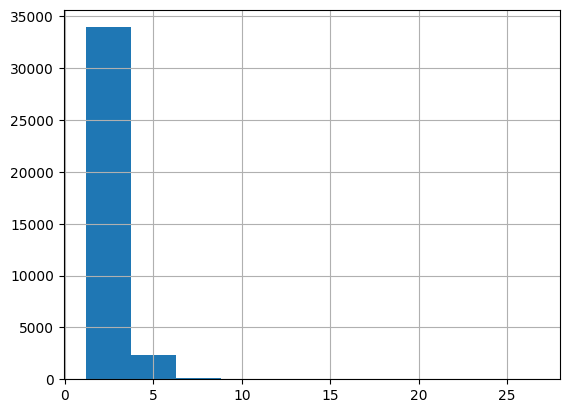

In [ ]:
df['engine_capacity'].hist();
print('Минимальное значение:', df['engine_capacity'].min(), 'Максимальное значение:', df['engine_capacity'].max())

Так как в данных встречается информация по легковым автомобилям и автобусам, есть смысл рассматривать их отдельно.

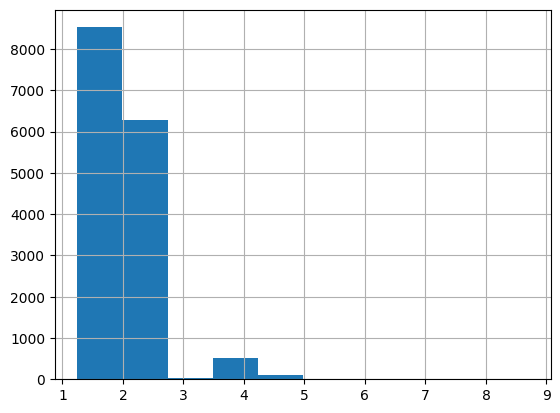

In [ ]:
df.query('segment == "Легковые автомобили"')['engine_capacity'].hist();

In [ ]:
df.query('segment == "Легковые автомобили" and engine_capacity >= 4').groupby(['name', 'engine_capacity'])['name'].count()

name                     engine_capacity
BMW 5 серия              4.4                  2
BMW 7 серия              4.4                  1
                         6.6                  2
BMW 8 серия              4.4                  1
Jaguar XF                5.0                  1
Mercedes-Benz CLS-Class  4.0                  2
Mercedes-Benz E-Class    4.0                  2
Mercedes-Benz S-Class    4.0                  3
Porsche Panamera         4.0                  3
Toyota Camry             4.6                 97
Toyota Corolla           4.0                131
Volkswagen Polo          8.7                  1
Name: name, dtype: int64

In [ ]:
# скорее всего для Volkswagen Polo есть выброс - 8, 7 л.
df.query('name == "Volkswagen Polo"').groupby('engine_capacity')['price'].agg(['mean', 'count'])

,mean,count
engine_capacity,,
1.6,14618.421868,512
2.0,15436.190923,3
8.7,15873.178420,1


Видно, что такая строчка всего 1, можно заполнить значением 1.6, как наиболее часто встречающимся или 2, так как больше подходит по цене.

In [ ]:
df.loc[(df['name'] == "Volkswagen Polo") & (df['engine_capacity'] == 8.7), 'engine_capacity'] = \
df.loc[(df['name'] == "Volkswagen Polo") & (df['engine_capacity'] == 8.7), 'engine_capacity'].fillna(2)

In [ ]:
df.query('name == "Volkswagen Polo" and engine_capacity == 8.7')['engine_capacity'] = \
df.query('name == "Volkswagen Polo" and engine_capacity == 8.7')['engine_capacity'].replace([8.7], [2], inplace = False)

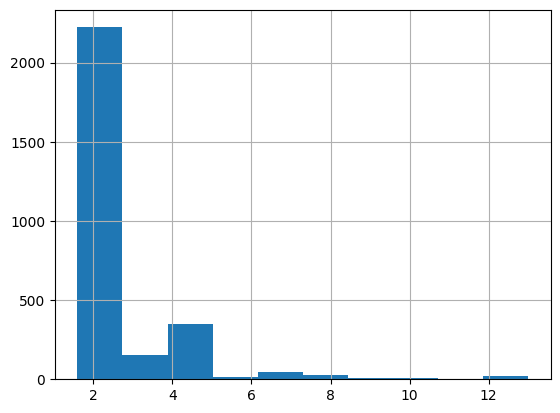

In [ ]:
df.query('segment == "Коммерческие автомобили"')['engine_capacity'].hist();

In [ ]:
# определим модели, у которых объем двигателя больше 99 перцентиля для сегмента - Комерческие автомобили
df[(df['segment'] == "Коммерческие автомобили") & (df['engine_capacity'] >= \
                                                   df.query('segment == "Коммерческие автомобили"')['engine_capacity'].quantile(0.99))]\
                                                   .groupby(['name', 'engine_capacity'])['name'].count()

name                           engine_capacity
Hyundai Truck & Bus Universe   12.3               2
MAN TG                         10.5               6
Mercedes-Benz Trucks Actros    11.0               1
                               12.0               5
                               12.8               1
Mercedes-Benz Trucks Tourismo  12.0               2
Scania G-Series                13.0               1
Scania P-Series                13.0               2
Scania R-Series                13.0               7
Scania S-Series                13.0               2
Name: name, dtype: int64

In [ ]:
# определим модели, у которых объем двигателя больше 99 перцентиля для сегмента - Внедорожники
df[(df['segment'] == "Внедорожники") & (df['engine_capacity'] >= \
                                                   df.query('segment == "Внедорожники"')['engine_capacity'].quantile(0.99))]\
                                                   .groupby(['name', 'engine_capacity'])['name'].count()

name               engine_capacity
Cadillac Escalade  6.2                 70
Chevrolet Niva     5.7                  1
                   6.7                  1
                   7.7                  1
                   8.7                  1
                   9.7                  1
                   10.7                 1
                   11.7                 1
                   12.7                 1
                   13.7                 1
                   14.7                 1
                   15.7                 1
                   16.7                 1
                   17.7                 1
                   18.7                 1
                   19.7                 1
                   20.7                 1
                   21.7                 1
                   22.7                 1
                   23.7                 1
                   24.7                 1
                   25.7                 1
                   26.7                 1

Среди внедорожников выделяется автомобиль **Chevrolet Niva**, для которого множество значений объема двигателя (скорее всего протянули столбец в Excel)

In [ ]:
df.query('name == "Chevrolet Niva"').groupby('engine_capacity')['name'].count().head()

engine_capacity
1.7    542
2.7      1
3.7      1
4.7      1
5.7      1
Name: name, dtype: int64

Судя по количеству строк со значением 1.7 и информации в Интернете, **1.7** - правильное значение для данной машины.

In [ ]:
df.loc[(df['name'] == "Chevrolet Niva") & (df['engine_capacity'] > 1.7), 'engine_capacity'] = 1.7

In [ ]:
df['segment'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

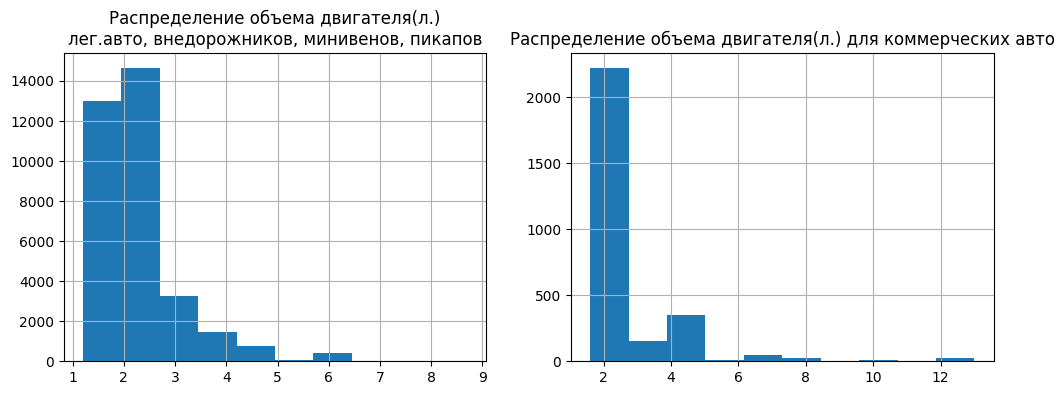

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
df.query('segment != "Коммерческие автомобили"')['engine_capacity'].hist()
plt.title('Распределение объема двигателя(л.)\nлег.авто, внедорожников, минивенов, пикапов')
plt.subplot(1, 2, 2)
df.query('segment == "Коммерческие автомобили"')['engine_capacity'].hist()
plt.title('Распределение объема двигателя(л.) для коммерческих авто');

**7. transmission** (8.1% пропусков)

In [ ]:
print(df.transmission.unique())
len(df.transmission.unique())

['S-tronic' 'S-Tronic' 'Tiptronic' 'АКПП' 'АКП' 'Steptronic' 'AT' '6 АТ'
 '5 МТ' '6АТ' 'MT' '8AT' '5МТ' 'Powershift S6' '6AT' nan 'Мех.' '6 AT'
 '6 MT' '6MT' '5 AT' '5AT' 'МКПП' '7 DCT' '7DCT' '8 AT' 'МТ' 'CVT' 'DCT'
 '4 АТ' '6 МТ' '6МТ' '4АТ' '4AT' '8АТ' '8 АТ' '5MT' 'AMT' 'CVT (вариатор)'
 'CVT (вариATор)' 'CVT(вAриATор)' '7G-TRONIC' '9G-TRONIC' '12AT' '12АТ'
 '5АТ' '7АТ' '7AT' '6M/T' 'PDK' '8-ступ АКПП' '8' '8АКПП'
 '8 АКПП Tiptronic S' '7 АКПП (PDK)' '7 АКПП PDK' '8 АКПП (PDK)' 'АТ' 'АT'
 'МT' '7 DSG' '7DSG' '6 DSG' '6DSG' '#Н/Д' 'DSG' '6A' '6А' '5M' 'A/T'
 'M/T' 'МКП' '5М' 'М/T' ' 7 АКП' '7АКП' 'А/T' '8A' 'TDI' '9AT' 'РЕДУКТОР'
 '0']


82

По ТЗ необходимо оставить только 2 трансмиссии: MT и AT.

In [ ]:
df['transmission'] = df['transmission'].replace(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic', '6 АТ', \
                                            '6АТ', '8AT','5 AT', '5AT', '7 DCT', '8 AT', 'CVT', '4 АТ', '4АТ', '4AT', \
                                                 'AMT', 'CVT (вариатор)', 'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', \
                                                 '9G-TRONIC', '12AT', '12АТ', '5АТ', '7АТ', '7AT', 'PDK', '8-ступ АКПП', \
                                                 '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK', '6А' \
                                                 '8 АКПП (PDK)', 'АТ', 'АT', '7 DSG', '7DSG', '6 DSG', '6DSG', 'DSG', '6A', \
                                                 'A/T', ' 7 АКП','7АКП','А/T','8A', '9AT', '6AT', '6 AT', '8АТ', '8 АТ', \
                                                '8 АКПП (PDK)', '6А', '7DCT', 'DCT', 'Powershift S6', 'РЕДУКТОР	', 'РЕДУКТОР'], 'AT', inplace = False)


df['transmission'] = df['transmission'].replace(['5 МТ', 'MT', '5МТ', 'Мех.', '6 MT', '6MT', 'МКПП', '6 МТ', '6МТ', '5MT'\
                                                '5MT', '6M/T', 'МT', '5M', 'M/T', 'МКП', '5М', 'М/T', '6МТ', 'МТ',\
                                                'MT', '5MT', 'TDI'], 'MT', inplace = False)

In [ ]:
# после преобразования остались некоторые значения
df.transmission.unique()

array(['AT', 'MT', nan, '8', '#Н/Д', '0'], dtype=object)

In [ ]:
# проверим значение 8
df.query('transmission == "8"').head(2).iloc[:, :11]

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive
21879,2019,Февраль,Mercur Auto,Porsche,Cayenne,2018,DEU,F,3.0,8,4WD
21880,2019,Февраль,Mercur Auto,Porsche,Cayenne,2018,DEU,F,3.0,8,4WD


In [ ]:
df.query('name == "Porsche Cayenne"').groupby('transmission')['name'].count()

transmission
8      5
AT    23
Name: name, dtype: int64

Ошибка в записи, скорее всего имелось ввиду 8 AT, необходимо заменить значение 8 на AT.

In [ ]:
# проверим значение 0
df.query('transmission == "0"').head(2).iloc[:, :11]

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive
24997,2019,Январь,Renault Россия,Renault,Sandero,2018,RUS,NaN,1.6,0,0
25002,2019,Январь,Renault Россия,Renault,Sandero,2018,RUS,NaN,1.6,0,0


In [ ]:
df.query('name == "Renault Sandero"')['transmission'].value_counts(dropna = False)

NaN    435
MT       3
0        3
Name: transmission, dtype: int64

**Скорее всего таким образом записаны пропуски**. Пропущенные значения также ничем нельзя заполнить, так как для данной машины могут быть разные типы трансмиссий.

In [ ]:
df['transmission'] = df['transmission'].replace(['8', '0', '#Н/Д'], ['AT', np.nan, np.nan])

In [ ]:
# проверим пропуски
df.query('transmission != transmission').groupby('name')['name'].count().sort_values(ascending = False)

name
Renault Duster                  650
Renault Sandero                 438
Ravon Nexia R3                  361
Renault Logan                   320
Renault Kaptur                  230
                               ... 
Jaguar I-Pace                     1
Scania G-Series                   1
Iveco Daily V                     1
Jaguar E-PACE                     1
Land Rover Range Rover Velar      1
Name: name, Length: 79, dtype: int64

Большая часть пропусков характерна для машин бренда Renault (по которым в целом мало информации).

**8.type_drive**

In [ ]:
print(df.type_drive.unique())
len(df.type_drive.unique())

['передний' 'FWD' 'quattro' 'Задний' 'Полный' 'AWD' 'Передний' '4WD'
 '4х2.2' nan 'RWD' '2 WD' '2WD' '4 WD' '4X4' '4х4' '4x4' '4x2' '4х2' '4X2'
 'Астана' 'Передний (FF)' '0' 'FF' '#Н/Д' 'полный' '4Motion']


27

По ТЗ необходимо оставить: RWD – задний привод, FWD – передний привод,
4WD – полный привод, 2WD – все остальное.

In [ ]:
df['type_drive'] = df['type_drive'].replace(['передний', 'Передний', 'Передний (FF)', 'FF'], 'FWD', inplace = False)
df['type_drive'] = df['type_drive'].replace(['Задний'], 'RWD', inplace = False)

df['type_drive'] = df['type_drive'].replace(['Полный', '4 WD', 'полный', '4Motion', 'AWD', '4X4', '4х4', '4x4', \
                                            '4WD', 'quattro'], '4WD', inplace = False)
df['type_drive'] = df['type_drive'].replace(['4х2.2', '2 WD', '2WD', '4x2', '4х2', '4X2'], '2WD', inplace = False)

df['type_drive'] = df['type_drive'].replace(['Астана', '0', '#Н/Д'], np.nan, inplace = False)

In [ ]:
# процент пропусков
len(df.query('type_drive != type_drive'))/len(df)

0.11036881349146775

In [ ]:
# проверим для каких машин пропуски
df.query('type_drive != type_drive').groupby('name')['name'].count().sort_values(ascending = False)

name
Renault Duster                   650
Renault Sandero                  438
Ravon Nexia R3                   361
Volkswagen Polo                  361
Renault Logan                    320
                                ... 
Land Rover Range Rover Evoque      1
Land Rover Range Rover Sport       1
Nefaz 5299                         1
Mercedes-Benz V-Class              1
Jaguar I-Pace                      1
Name: name, Length: 99, dtype: int64

In [ ]:
df.query('name == "Volkswagen Polo"').groupby('type_drive')['name'].count()

type_drive
2WD     77
4WD      3
FWD    103
Name: name, dtype: int64

Придется оставить пропуски, так как сущетсвуют разные комплектации машин



**9. region**

In [ ]:
print(df.region.unique())
len(df.region.unique())

['Алматы' 'Нур-Султан' 'Усть-Каменогорск' 'Уральск' 'Костанай' 'Павлодар'
 'Семей' 'Шымкент' 'Актау' 'Атырау' 'Актобе' 'Караганда' 'Петропавловск'
 'Кокшетау' 'Рудный' 'Кызылорда' 'Тараз' 'Туркестан' 'Талдыкорган'
 'ЭКСПОРТ' 'Кульсары' 'Каскелен' 'Экибастуз' 'Риддер' 'Сарыагаш'
 'Зыряновск']


26

In [ ]:
# приведем значения к одному виду
df['region'] = df['region'].replace(['ЭКСПОРТ'], ['Экспорт'], inplace = False)

**10. client**

In [ ]:
print(df.client.unique())
len(df.client.unique())

['Физ. Лицо' 'Юр. Лицо' nan 'Юр.Лицо' 'физ.лицо' 'юридическое'
 'физическое' 'ФизЛицо' 'ЮрЛицо' 'Корп. клиент']


10

In [ ]:
# заменим неявные дубликаты
df['client'] = df['client'].replace(['Физ. Лицо', 'физ.лицо', 'физическое', 'ФизЛицо'], 'Физ.лицо', inplace = False)
df['client'] = df['client'].replace(['Юр. Лицо', 'Юр.Лицо', 'юридическое', 'ЮрЛицо'], 'Юр.лицо', inplace = False)

In [ ]:
len(df.query('client != client'))/len(df)

0.176324876144723

In [ ]:
#посмотрим, различаются ли физ. и юр. лицо по количеству машин в заказе
df.groupby('client')['amount'].agg({'count', 'mean', 'median', 'max'})

,count,max,mean,median
client,,,,
Корп. клиент,161,1.0,1.000000,1.0
Физ.лицо,24733,7.0,1.000364,1.0
Юр.лицо,8025,70.0,1.041620,1.0


Видно, что по среднему разницы практически нет, но некоторые заказы у юр.лиц могут достигать 70 машин.

**11. amount**

In [ ]:
print(df.amount.unique())
len(df.amount.unique())

[  1.   2.   4.   3.   7.   5.   8.  10.   6.   9.  11.  19.  12.  70.
  29.  18.  37.  17.  15.  24.  14.  13.  25.  63.  23.  30.  21.  60.
  nan  22.  16.  35.  28.  32.  54. 115.  46.  33.  47.  20.  66.  27.
  50.  36.  26.  31.  34.  40.  43.  51.  42.  38.  41. 100.  -1.  79.
  62.]


57

In [ ]:
# рассмотрим, значение -1
df.query('amount == -1')

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013,name
25728,2019,Август,БИПЭК АВТО,Skoda,Superb,2019,KAZ,F,2.0,AT,4WD,Тараз,NaN,-1.0,35588.25,-35588.25,Жамбылская область,Легковые автомобили,D класс,Skoda Superb


Данная запись похожа на возврат, так как в sales отрицательная сумма заказа. Скорее всего лучше удалить эту строку для дальнейшего анализа, чтобы не искажало количество и сумму проданных товаров.

In [ ]:
# значения с пропусками
df.query('amount != amount')

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013,name
16741,2019,Август,БИПЭК АВТО,Kia,Sportage,2019,KAZ,F,1.999,AT,4WD,Караганда,NaN,NaN,20700.0,0.0,Карагандинская область,Внедорожники,Компактные SUV,Kia Sportage
17368,2019,Август,БИПЭК АВТО,Lada,Granta,2019,KAZ,F,1.596,AT,FWD,Алматы,NaN,NaN,7100.0,0.0,г.Алматы,Легковые автомобили,B класс,Lada Granta
18676,2019,Август,БИПЭК АВТО,Lada,XRAY,2018,KAZ,F,1.596,MT,FWD,Экибастуз,NaN,NaN,13800.0,0.0,Павлодарская область,Легковые автомобили,B класс,Lada XRAY
37416,2019,Август,БИПЭК АВТО,UAZ,3909,2018,KAZ,F,2.693,MT,4WD,Алматы,NaN,NaN,11200.0,0.0,г.Алматы,Коммерческие автомобили,Развозные автомобили,UAZ 3909
37727,2019,Август,БИПЭК АВТО,UAZ,Patriot,2018,KAZ,F,2.693,MT,4WD,Семей,NaN,NaN,13800.0,0.0,Восточно-Казахстанская область,Внедорожники,Среднеразмерные SUV,UAZ Patriot
38775,2019,Август,БИПЭК АВТО,Skoda,Kodiaq,2019,KAZ,F,2.000,AT,4WD,Нур-Султан,NaN,NaN,40000.0,0.0,г.Нур-Султан,Внедорожники,Полноразмерные SUV,Skoda Kodiaq


Похоже на то, что эти машины не проданы, так как в sales значение 0. Поэтому также удалим эти значения.

In [ ]:
df = df[df['amount'] >= 1]

In [ ]:
# преобразуем в int
df['amount'] = df['amount'].astype('int')

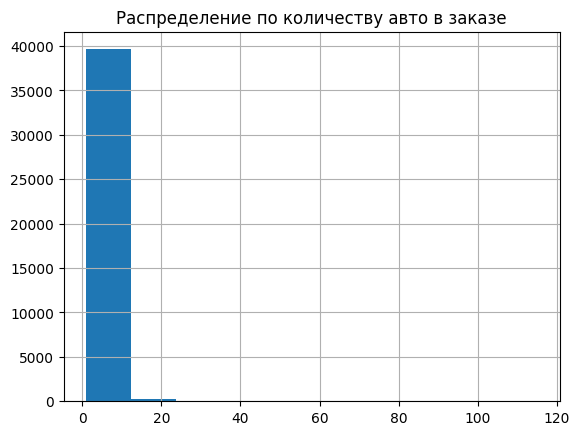

In [ ]:
df['amount'].hist()
plt.title('Распределение по количеству авто в заказе');

Видно, что большая часть машин продается до 10 экземпляров, **но есть выбросы до 120.**

In [ ]:
df.query('amount > 80')

,sales_year,sales_month,company,brand,model,year_car,country,fuel,engine_capacity,transmission,type_drive,region,client,amount,price,sales,oblast,segment,class_2013,name
16885,2019,Май,БИПЭК АВТО,Lada,4x4,2019,KAZ,F,1.69,MT,4WD,Тараз,NaN,115,9000.0,1035000.0,Жамбылская область,Внедорожники,Субкомпактные SUV,Lada 4x4
25555,2019,Июль,БИПЭК АВТО,Skoda,Octavia,2019,KAZ,F,1.40,MT,FWD,Тараз,NaN,100,18700.0,1870000.0,Жамбылская область,Легковые автомобили,C класс,Skoda Octavia


Для данных строк не указаны типы клиентов, но это возможная ситуация, так как сумма продажи в итоге умножается на количество товаров.


**12. price**

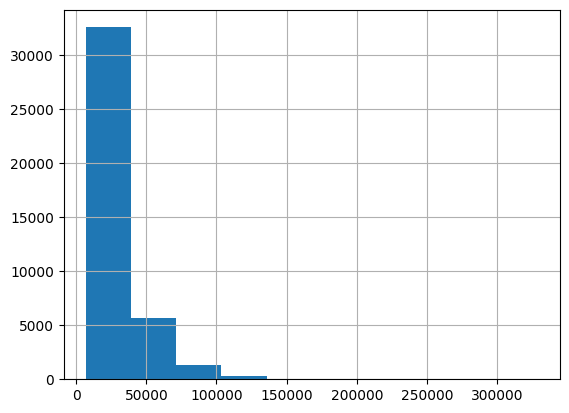

In [ ]:
df['price'].hist();

Так как в таблице собраны различные типы автомобилей, различной категории и бренда, цены сильно различаются.

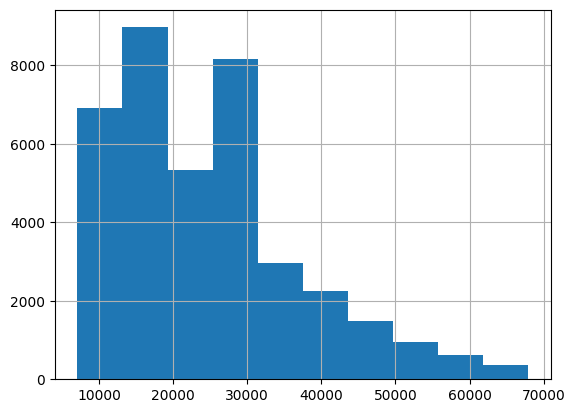

In [ ]:
# распределение цены до 95-го перцентиля
df[df['price'] <= df['price'].quantile(0.95)]['price'].hist();

**Для большей части авто характерна цена до 30 000$.**

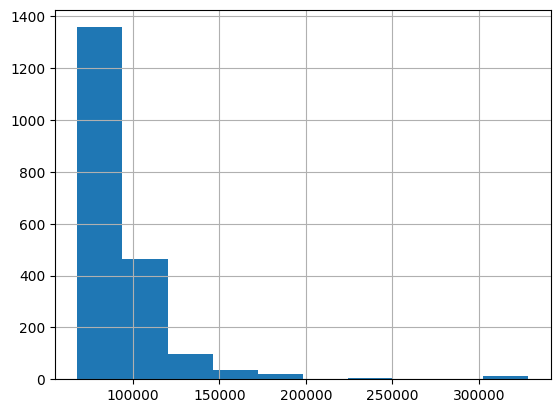

In [ ]:
df[df['price'] > df['price'].quantile(0.95)]['price'].hist();

In [ ]:
# сгруппируем авто по классам
df[df['price'] > df['price'].quantile(0.95)].groupby('class_2013')['price']\
                            .agg({'count', 'max', 'mean', 'median'}).sort_values(by = 'count', ascending = False).head()

,count,max,mean,median
class_2013,,,,
Полноразмерные SUV,1337,218681.74430,90227.189572,83573.31240
Большие автобусы,321,328510.97060,101337.604989,80905.04720
Крупнотоннажные грузовики,97,147701.63540,85134.128179,74305.39293
Среднеразмерные SUV,95,126663.56660,79944.266853,68410.28782
Средние автобусы,44,98175.23246,93809.709956,91979.00697


**Самое большое количество машин с ценой выше 95-го перцентиля характерно для класса - Полноразмерные SUV.**

Самое дорогое авто относится к классу **Большие автобусы**.

В столбце **sales** нет пропусков, значения price * amount, поэтому распределение будет сильно смещено.

In [ ]:
print(f'Минимальная сумма продаж: {df.sales.min()}, максимальная сумма продаж: {df.sales.max()}')

Минимальная сумма продаж: 7100.0, максимальная сумма продаж: 3778206.264


**13. oblast**

In [ ]:
# проверим на неявные дубликаты
print(df.oblast.unique())
len(df.oblast.unique())

['г.Алматы' 'г.Нур-Султан' 'Восточно-Казахстанская область'
 'Западно-Казахстанская область' 'Костанайская область'
 'Павлодарская область' 'Южно-Казахстанская область'
 'Мангистауская область' 'Атырауская область' 'Актюбинская область'
 'Карагандинская область' 'Северо-Казахстанская область'
 'Акмолинская область' 'Кызылординская область' 'Жамбылская область'
 'Туркестанская область' 'Алматинская область' 'Экспорт область']


18

In [ ]:
# переименуем Экспорт область
df['oblast'] = df['oblast'].replace('Экспорт область', 'Экспорт')

In [ ]:
df['region'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'Экспорт', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

**Преобразование даты**

In [ ]:
# создадим периоды
pd.date_range(start = datetime(year = 2019, month = 1, day = 1),
              periods = 12,
              freq = "M")

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
dict = {'Май': '2019-05-31', 'Август': '2019-08-31' , 'Апрель': '2019-04-30', \
        'Июль': '2019-07-31', 'Февраль': '2019-02-28', 'Июнь': '2019-06-30', \
        'Сентябрь':'2019-09-30', 'Январь':'2019-01-31', 'Март':'2019-03-31'}

In [ ]:
# заменим значение месяца
df['sales_month'] = df['sales_month'].map(dict)

# преобразуем тип столбца в дату
df['sales_month'] = pd.to_datetime(df['sales_month'])

# удалим лишние столбцы
df = df.rename(columns = {'sales_month': 'sales_date'}).drop('sales_year', axis = 1)

## Создание основы для карты

In [ ]:
# загружаем области и координаты
#import json

#with open('/content/gadm41_KAZ_1_1.json', 'r', encoding='utf-8') as f:
#    d = json.load(f)

In [ ]:
# записываем названия в отдельный список
#names = []
#for item in range(len(d['features'])):
#  x = (d['features'][item]['properties']['VARNAME_1'])
#  names.append(x)

In [ ]:
# записываем координаты в отдельный список
#geo_coor = []
#for item in range(len(d['features'])):
#  coordinates = []
#  for i in range(len(d['features'][item]['geometry']['coordinates'][0][0])):
#    y = d['features'][item]['geometry']['coordinates'][0][0][i]
#    y.reverse()
#    coordinates.append(y)
#  geo_coor.append(str([coordinates]))

In [ ]:
# создаем таблицу с областями и координатами
#geo_df = pd.DataFrame({'name' : names, 'coordinates' : geo_coor})
#geo_df['code'] = np.arange(len(geo_df))

In [ ]:
# добавим к основной таблице ключ для соединения
#df['code'] = df['oblast'].replace(['г.Алматы', 'Алматинская область', 'г.Нур-Султан', 'Акмолинская область', \
#                                    'Актюбинская область', 'Атырауская область', 'Восточно-Казахстанская область', \
#                                   'Мангистауская область', 'Северо-Казахстанская область', 'Павлодарская область',\
#                                    'Карагандинская область', 'Костанайская область', 'Кызылординская область', \
#                                    'Туркестанская область', 'Южно-Казахстанская область', 'Западно-Казахстанская область', \
#                                    'Жамбылская область', 'Экспорт'],
#                                   [0, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 100])

In [ ]:
#df.to_csv('market_kaz.csv', index = False)
#geo_df.to_csv('geo_df.csv', index = False)

## Анализ авторынка Казахстана

### 3.1. Топовые марки на рынке Казахстана: в денежном и натуральном выражении

In [ ]:
# создадим функцию для графиков
import textwrap
max_width = 15
def graph_func(group, column, title, label):
    ax = df.groupby(group)[column].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
    plt.title (title)
    plt.xticks(rotation = 60)
    plt.xlabel(label)
    ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

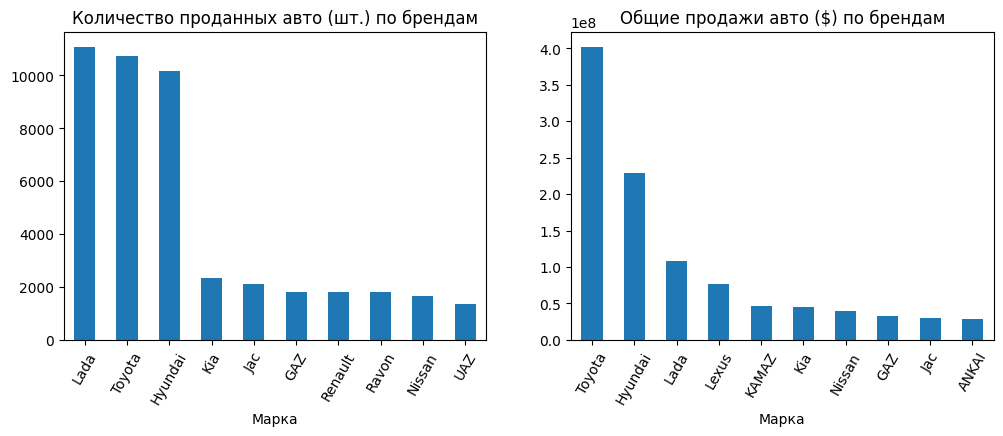

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
graph_func('brand', 'amount', 'Количество проданных авто (шт.) по брендам', 'Марка')
plt.subplot(1, 2, 2)
graph_func('brand', 'sales', 'Общие продажи авто ($) по брендам', 'Марка')

ТОП-3 бренда **по количеству проданных машин** за весь рассматриваемый период - **Lada, Toyota, Hyundai**. Продажи машин данных брендов превышают 10 000 штук.
На графике виден резкий спад по количеству проданных машин для брендов после топ-3.

В денежном выражении **самые высокие продажи** характерны для бренда **Toyota** (400 M, $), **Hyundai и Lada**. Таким образом, ТОП-3 брендов различается порядком, что скорее всего связано с различной средней стоимостью машин брендов.

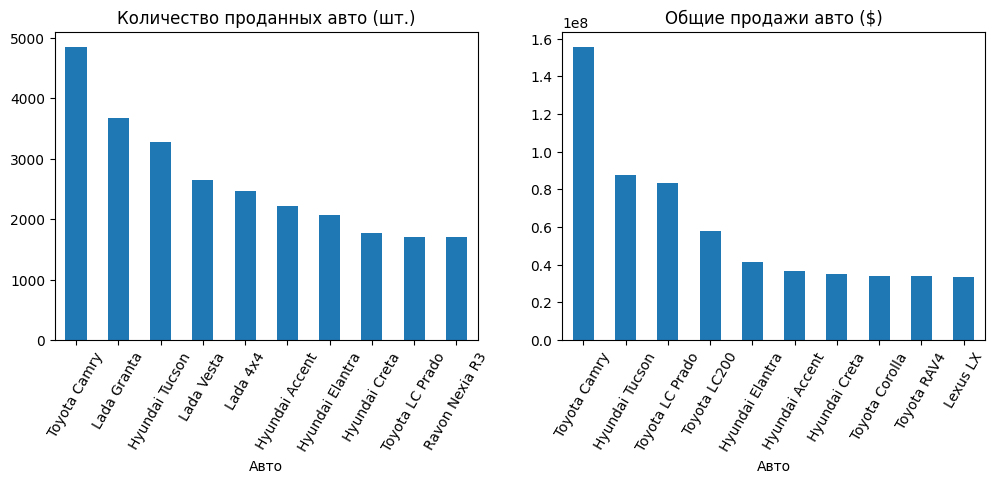

In [ ]:
# рассчитаем продажи по конкретным моделям авто
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
graph_func('name', 'amount', 'Количество проданных авто (шт.)', 'Авто')
plt.subplot(1, 2, 2)
graph_func('name', 'sales', 'Общие продажи авто ($)', 'Авто')

Самой продаваемой машиной и по количеству, и в денежном выражении является **Toyota Camry** (около 5 000 проданных машин на сумму 160 М, $).

### 3.2. Продажи на рынке Казахстана всех марок в денежном и натуральном выражении

In [ ]:
print(f'Продажи машин составили {df["amount"].sum()} шт.')

Продажи машин составили 53875 шт.


In [ ]:
print(f'Продажи машин составили {round(df["sales"].sum()/1000000, 2)} M. $')

Продажи машин составили 1349.19 M. $


Показатели приближены к официальной статистике.

### 3.3. Динамика продаж в целом по рынку: в денежном и натуральном выражении (помесячно)

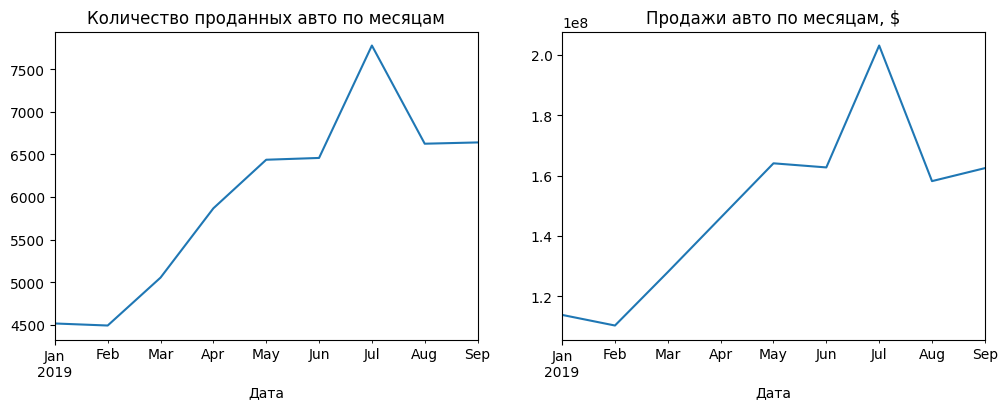

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
df.groupby('sales_date')['amount'].sum().plot()
plt.title('Количество проданных авто по месяцам')
plt.xlabel('Дата')
plt.subplot(1, 2, 2)
df.groupby('sales_date')['sales'].sum().plot()
plt.title('Продажи авто по месяцам, $')
plt.xlabel('Дата');

Графики продаж в натуральном и денежном выражении имеют одинаковый **пик в Июле (было продано более 7 500 машин на сумму 200M, $)**.

**Минимум продаж характерен для Января и Февраля.**

С весны начинается постепенный рост продаж, пик достигается в Июле, затем происходит спад. (Есть вероятность, что для рынка авто характерна сезонность).

In [ ]:
# проверим, какая машина продавалась больше всего в июне
df.query('sales_date == "2019-07-31"').groupby('name')['amount'].sum().\
                                                          sort_values(ascending = False).head().to_frame()

,amount
name,
Jac S3,641
Toyota Camry,629
Lada Granta,433
Lada Vesta,423
Hyundai Tucson,411


In [ ]:
# проверим, в какие месяце бренд Jac продавался больше всего
(df.query('brand == "Jac"').groupby('sales_date')['amount'].sum() / df.query('brand == "Jac"')['amount'].sum() * 100)\
                                          .sort_values(ascending = False).head().to_frame()

,amount
sales_date,
2019-07-31,39.066222
2019-05-31,12.053359
2019-09-30,10.338256
2019-08-31,9.051929
2019-06-30,8.527870


**В июле было продано почти 40% машин бренда Jac** от всех машин данного бренда за исследуемый период. Скорее всего пик продаж в июле можно объяснить увеличением продаж машины бренда Jac.

In [ ]:
# посмотрим, в каких областях были продажи
df.query('brand == "Jac" and sales_date == "2019-07-31"').groupby('oblast')['amount'].sum().\
                                                     sort_values(ascending = False).head().to_frame()

,amount
oblast,
Экспорт,694
Костанайская область,28
Южно-Казахстанская область,22
г.Нур-Султан,19
г.Алматы,15


**Большая часть машин бренда Jac в июле отправлялась на экспорт**

In [ ]:
# распределение по типам клиентов
df.query('brand == "Jac" and sales_date == "2019-07-31"').groupby('client')['amount'].sum().\
                                                     sort_values(ascending = False).to_frame()

,amount
client,
Юр.лицо,708
Физ.лицо,112


**Большая часть покупок производилась юр.лицами.** В 2019 году начали поставлять определенные модели Jac в Россию из Казахстана, возможно, на июль пришлась большая часть поставок и это вызвало увеличение продаж автомобилей.

### 3.4. Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент

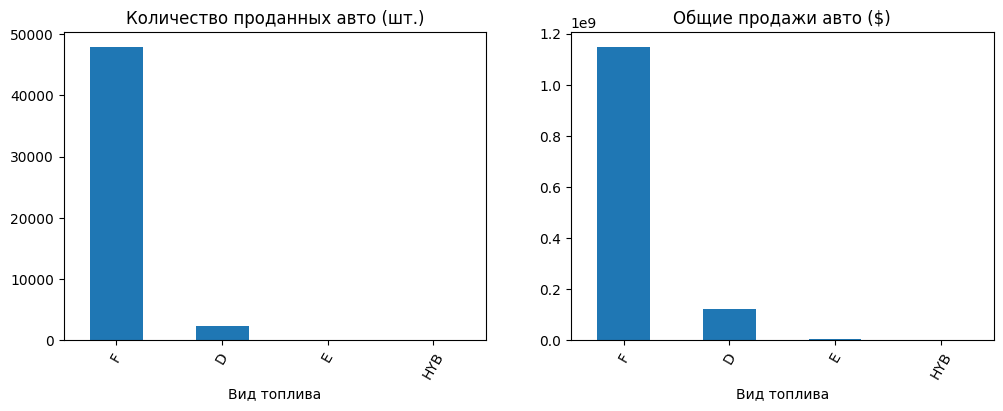

In [ ]:
# рассчитаем продажи машин по виду топлива
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
graph_func('fuel', 'amount', 'Количество проданных авто (шт.)', 'Вид топлива')
plt.subplot(1, 2, 2)
graph_func('fuel', 'sales', 'Общие продажи авто ($)', 'Вид топлива')

Большая часть продаж в натуральном и денежном выражении приходится на машины на бензине.

In [ ]:
labellist = (df['sales_date'].sort_values().dt.strftime("%Y-%m")).unique().tolist()
tickvalues = range(0,len(df['sales_date'].unique()))

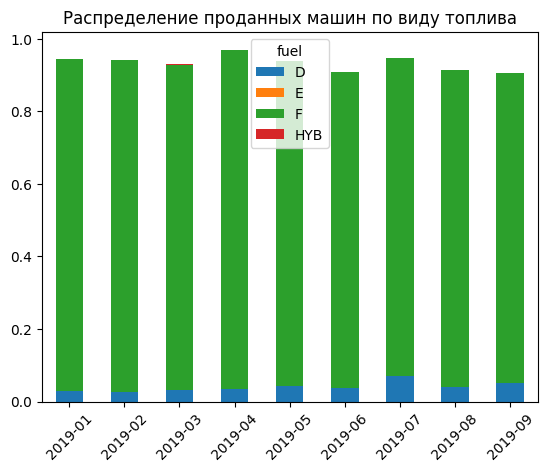

In [ ]:
(df.groupby(['sales_date','fuel'])['amount'].sum()/df.groupby('sales_date')['amount'].sum())\
.unstack().plot(kind = 'bar', stacked = True)
plt.title('Распределение проданных машин по виду топлива')
plt.xlabel('')
plt.xticks(ticks = tickvalues ,labels = labellist, rotation = 45);

Нормированная диаграмма не достигает 1, так как в данных содержатся пропуски в типе топлива. **Для всех месяцев характерно преобладание машин с бензином**, но в июле доля машин на дизеле немного выше, чем в остальные месяцы.

In [ ]:
# машины, проданные в июле, с дизельным топливом
df.query('sales_date == "2019-07-31" and fuel == "D"').groupby('name')['amount'].sum().\
sort_values(ascending = False).head().to_frame()

,amount
name,
ANKAI HFF6850G,138
Daewoo BC 095,50
KAMAZ 65115,43
KAMAZ 43118,40
Yutong ZK6108HGH,31


In [ ]:
df.query('name == "ANKAI HFF6850G"').groupby('sales_date')['amount'].sum().sort_values(ascending = False).to_frame()

,amount
sales_date,
2019-07-31,138
2019-05-31,51
2019-09-30,24
2019-06-30,22
2019-08-31,5


Увеличение доли машин с дизельным двигателем в июле может быть вызвано **увеличением продаж автобуса ANKAI HFF6850G.**

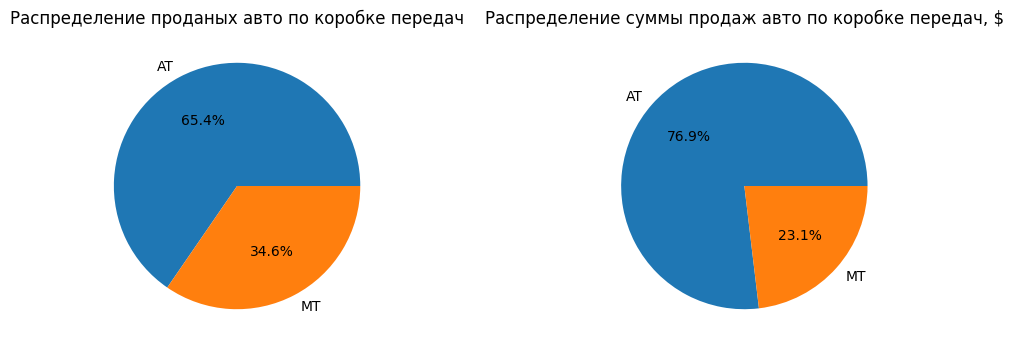

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
df.groupby('transmission')['amount'].sum().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Распределение проданых авто по коробке передач')
plt.ylabel('')
plt.subplot(1, 2, 2)
df.groupby('transmission')['sales'].sum().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Распределение суммы продаж авто по коробке передач, $')
plt.ylabel('');

Более 65% в натуральном выражении и около 77% в денежном выражении приходится на машины с автоматической коробкой передач.

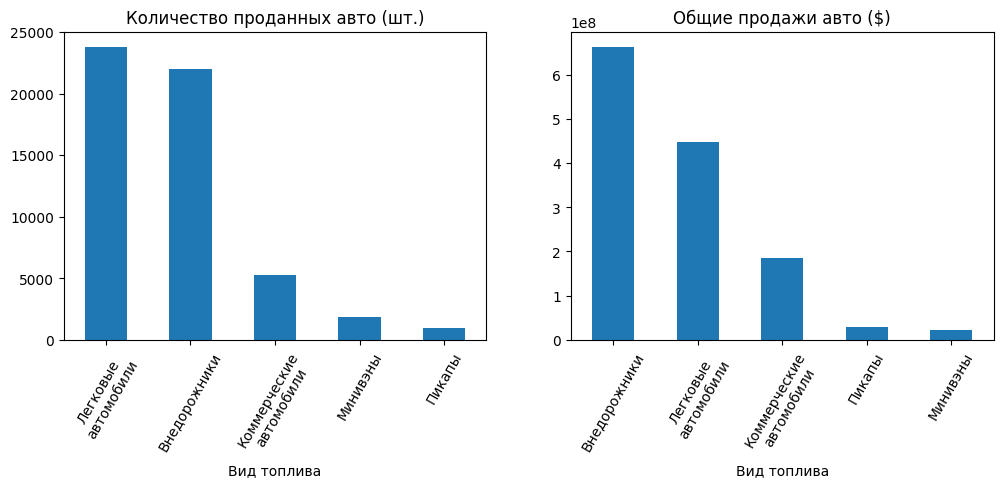

In [ ]:
# рассчитаем продажи машин по сегменту
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
graph_func('segment', 'amount', 'Количество проданных авто (шт.)', 'Вид топлива')
plt.subplot(1, 2, 2)
graph_func('segment', 'sales', 'Общие продажи авто ($)', 'Вид топлива')

По количеству проданных авто большая часть приходится на 2 сегмента: **легковые автомобили и внедорожники.** В денежном выражении большая часть приходится на сегмент - внедорожников.

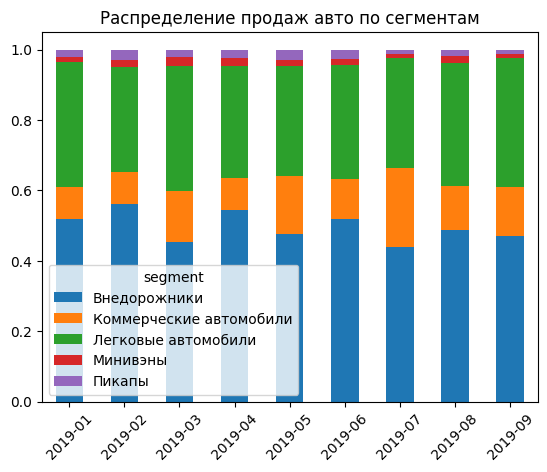

In [ ]:
(df.groupby(['sales_date','segment'])['sales'].sum()/df.groupby('sales_date')['sales'].sum()).\
unstack().plot(kind = 'bar', stacked = True)
plt.xticks(ticks = tickvalues ,labels = labellist, rotation = 45)
plt.title('Распределение продаж авто по сегментам')
plt.xlabel('');

Для каждого из месяцев характерно схожее распределение по сегментам. Видно, что **в июле доля коммерческих авто больше**, чем для остальных месяцев. Это скорее связано с увеличением покупки автобусов (пред. пункт)

In [ ]:
# проданные коммерческие авто в июле
df.query('segment == "Коммерческие автомобили" and sales_date == "2019-07-31"').\
groupby('name')['amount'].sum().sort_values(ascending = False).head()

name
ANKAI HFF6850G    138
GAZ 3302           95
Daewoo BC 095      50
KAMAZ 65115        43
UAZ 3962           41
Name: amount, dtype: int64

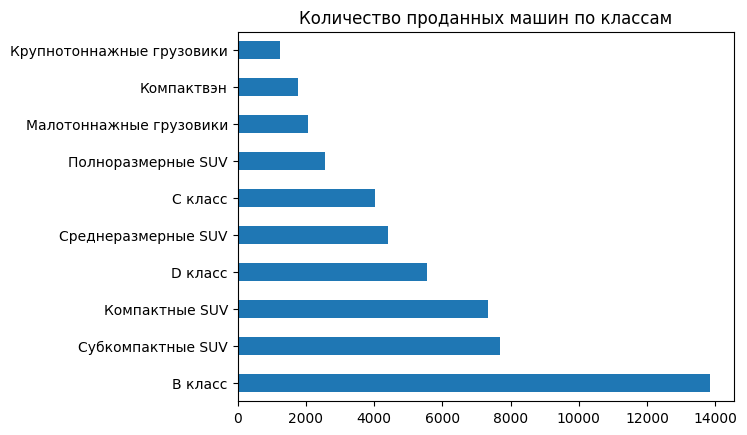

In [ ]:
# рассчитаем продажи машин по классу
df.groupby('class_2013')['amount'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.ylabel('')
plt.title('Количество проданных машин по классам');

Около 14 000 машин приходится на **B-класс**, в равной степени представлены **субкомпактные SUV и компактные SUV** (по 8 000).

In [ ]:
# топ-5 машин B-класса по количеству продаж
df.query('class_2013 == "B класс"').groupby('name')['amount'].sum().sort_values(ascending = False).head().to_frame()

,amount
name,
Lada Granta,3664
Lada Vesta,2653
Hyundai Accent,2211
Ravon Nexia R3,1700
Volkswagen Polo,1032


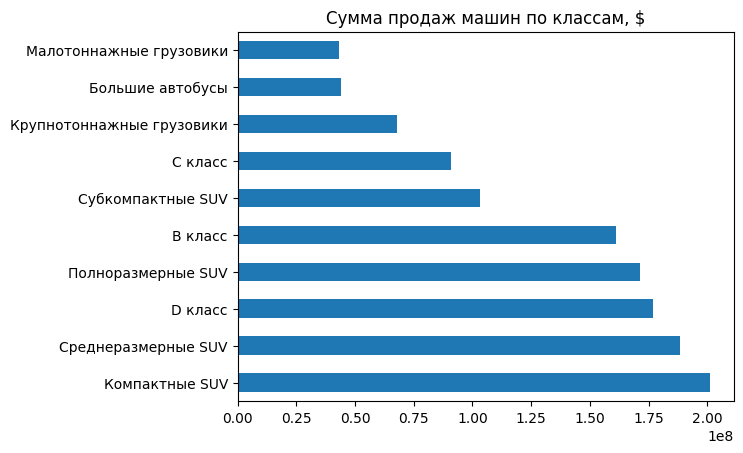

In [ ]:
# рассчитаем продажи машин по классу
df.groupby('class_2013')['sales'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.ylabel('')
plt.title('Сумма продаж машин по классам, $');

По сумме продаж выделяются топ-5 классов: **компактные SUV, среднеразмерные SUV, D-класс, полноразмерные SUV, B-класс**.


In [ ]:
# топ-5 машин класса компактные SUV по сумме продаж
df.query('class_2013 == "Компактные SUV"').groupby('name')['sales'].sum().sort_values(ascending = False).head().to_frame()

,sales
name,
Hyundai Tucson,8.731565e+07
Toyota RAV4,3.372513e+07
Nissan Qashqai,1.504970e+07
Nissan X-Trail,1.341434e+07
Mitsubishi Outlander,9.013601e+06


### 3.5. Продажи по регионам

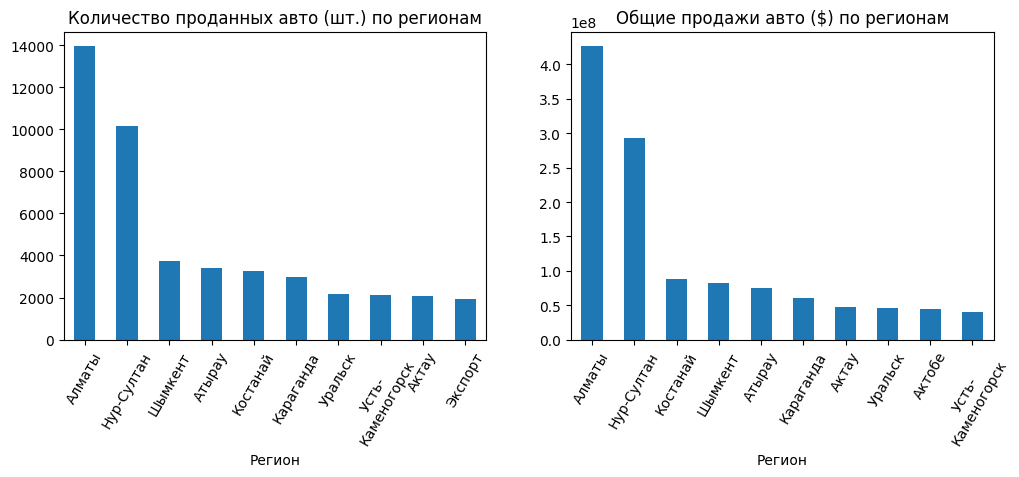

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
graph_func('region', 'amount', 'Количество проданных авто (шт.) по регионам', 'Регион')
plt.subplot(1, 2, 2)
graph_func('region', 'sales', 'Общие продажи авто ($) по регионам', 'Регион')

Самые высокие продажи характеры для регионов **Алматы и Нур-Султан**, данные города являются самыми крупными по населению.

На экспорт приходится около 2 000 машин, но как видно из графика, продажи от экспорта не входят в топ-10.

In [ ]:
# посмотрим, различаются ли модели внутри страны и идущие на экспорт
df.query('region == "Экспорт"').groupby('name')['amount'].sum().sort_values(ascending = False).head(5)

name
Jac S3            992
Jac S5            246
Ravon Nexia R3    138
Toyota Camry       77
Hyundai Accent     64
Name: amount, dtype: int64

In [ ]:
df.query('region != "Экспорт"').groupby('name')['amount'].sum().sort_values(ascending = False).head(5)

name
Toyota Camry      4776
Lada Granta       3664
Hyundai Tucson    3256
Lada Vesta        2653
Lada 4x4          2469
Name: amount, dtype: int64

Как видно, наиболее продающиеся машины различаются в зависимости от страны продажи (внутри или вне).

**Большая часть машин, идущая на экспорт** приходится на **бренд Jac**, так как в Костанайской области есть завод по сборке данного бренда и в 2019 году в России еще не было сборки этих машин.

### 3.6. Продажи по автоцентрам

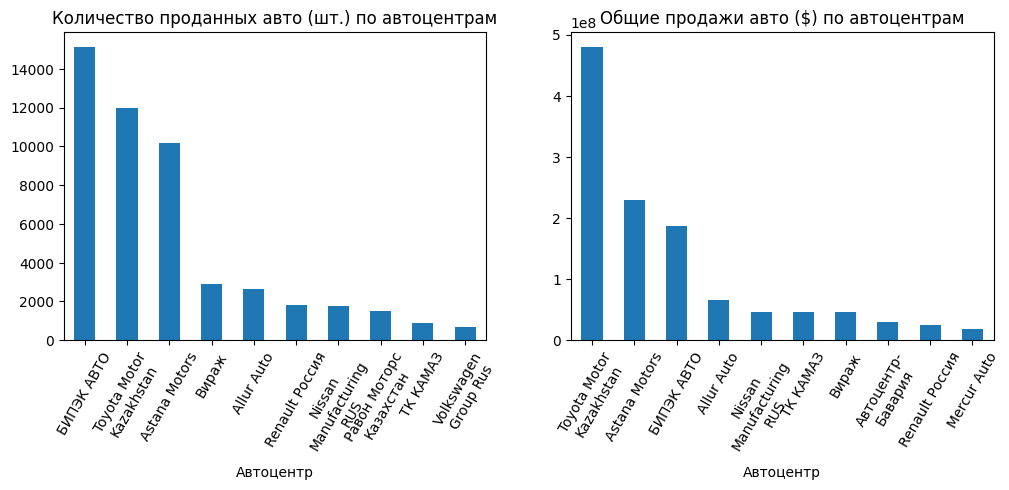

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
graph_func('company', 'amount', 'Количество проданных авто (шт.) по автоцентрам', 'Автоцентр')
plt.subplot(1, 2, 2)
graph_func('company', 'sales', 'Общие продажи авто ($) по автоцентрам', 'Автоцентр')

ТОП 3-автоцентра по количеству проданных машин - **БИПЭК АВТО, Toyota Motor Kazakhstan и Astana Motors.** По сумме продаж в денежном выражении меняется порядок автоцентром. ***Продажи по автоцентрам в большей степени зависят от продаваемых ими брендов авто.***

## Выводы:

1. За исследуемый период 01.2019 - 09.2019 **было продано 53 875 машины на сумму 1 349.19 M. $.**

2. **ТОП-3 бренда по количеству** проданных машин за весь рассматриваемый период - **Lada, Toyota, Hyundai.** Продажи машин данных брендов превышают 10 000 штук.

 **В денежном выражении** самые высокие продажи характерны для **бренда Toyota** (400 M, $).

 Самой продаваемой машиной в натуральном и в денежном выражении является **Toyota Camry** (около 5 000 проданных машин на сумму 160 М, $).

3. Динамика продаж имеет **пик в июле** (продано 7 500 машин на сумму 200M, $). Минимум продаж характерен для Января и Февраля.

  Пик мог быть вызван увеличением продаж машин бренда Jac юр.лицами, а также увеличением продаж автобуса ANKAI HFF6850G.

4. **Большая часть** продаж в натуральном и денежном выражении приходится на **машины на бензине**.

5. Более 65% в натуральном выражении и около 77% в денежном выражении приходится на **машины с автоматической коробкой передач.**

6. По количеству проданных авто большая часть приходится на 2 сегмента: **легковые автомобили и внедорожники.** В денежном выражении большая часть приходится на сегмент - внедорожников.

7. По сумме продаж выделяются **топ-5 классов**: компактные SUV, среднеразмерные SUV, D-класс, полноразмерные SUV, B-класс.

8. **Самые высокие продажи характеры для регионов Алматы и Нур-Султан**, данные города являются самыми крупными по населению.

9. Наиболее продающиеся машины различаются в зависимости от страны продажи (внутри или вне). Большая часть машин, идущая на экспорт приходится на бренд Jac.

10. **ТОП 3-автоцентра** по количеству проданных машин - **БИПЭК АВТО, Toyota Motor Kazakhstan и Astana Motors.** Продажи по автоцентрам в большей степени зависят от продаваемых ими брендов авто.